**Autor:** [Matej Uhrin](mailto:5283652@upjs.sk)

**Podporné materiály k bakalárskej práci <i>Simulácie vybraných stochastických procesov v interaktívnom prostredí</i>**

***

<br>

**<font size=10 color=brown> Homogénny Poissonov proces</font>**

<br>

<a id=table_of_contents></a>
##  Obsah
* [Algoritmus simulácie generovaním časov medzi udalosťami](#algo)
* [Transplantácie obličiek](#kidneys)

<font size=3>Pre návrat na obsah stlačte klávesu Home.</font>
---

In [1]:
# nacitanie balikov
import numpy as np
import matplotlib.pyplot as plt

***
<a id=algo><a>
## Algoritmus simulácie generovaním časov medzi udalosťami
<blockquote>Časy medzi udalosťami v Poissonovom procese sú nezávislé náhodné veličiny s exponenciálnym rozdelením. Preto nám stačí postupne generovať náhodné čísla z exponenciálneho rozdelenia a kumulovane ich spočítavať. Pre generovanie hodnoty $v$ z exponenciálneho rozdelenia je možné využiť vzťah $v=-\mu\ln u$, kde $u$ je náhodné číslo z $[0,1]$ a $\mu$ je stredná hodnota exponenciálneho rozdelenia. Algoritmus je nasledovný:

- Na vstupe máme Poissonov proces $\{N(t), t\ge0\}$ s intenzitou $\lambda>0$. Zvolíme $T>0$, maximálny čas, po ktorý chceme proces simulovať.
- Položíme $t=0$ (aktuálny čas).
- Generujeme náhodné číslo $u$ z intervalu $[0,1]$.
- Položíme $t=t-\dfrac{\ln u}{\lambda}$.
- Ak $t>T$, tak algoritmus končíme. Inak zapíšeme $t$ ako čas udalosti a pokračujeme 3. bodom.

Na konci dostaneme realizáciu Poissonovho procesu s danou intenzitou $\lambda$ ako množinu časov jednotlivých udalostí.</blockquote>


Ukážme implementáciu tohto algoritmu v Python-e:

In [3]:
def Poisson_process(rate, max_time):
    """
    Vykona realizaciu homogenneho Poissonovho procesu.
    
    :param rate: intenzita procesu (kladne cislo)
    :param max_time: maximalny cas simulacie
    :return: pole casov udalosti
    """
    rng = np.random.default_rng()

    arrivals = []
    time = 0

    while True:
        u = rng.random()
        time -= np.log(u) / rate
        if time > max_time:
            return np.array(arrivals)
        else:
            arrivals.append(time)

Na demonštráciu algoritmu uvažujme Poissonov proces s intenzitou $\lambda=2$ a chceme simulovať výskyty udalostí po čas 5.

Casy udalosti:
[0.35083108 0.69147221 1.02742326 1.09717197 1.36635965 2.00407519
 2.07773301 2.0922952  2.61292848 3.52320034 4.29972954 4.31123735
 4.4081296  4.77376731]


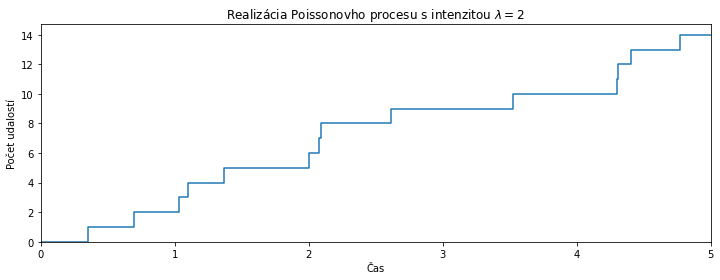

In [5]:
rate = 2
max_time = 5

events = Poisson_process(rate, max_time)
print(f"Casy udalosti:\n{events}")

# vykreslenie grafu
plt.figure(figsize=(12, 4))
plt.step([0, *events, max_time], [0, *np.arange(len(events) + 1)])
plt.xlim(0, max_time)
plt.ylim(0, None)
plt.title(f"Realizácia Poissonovho procesu s intenzitou $\lambda = {rate}$")
plt.xlabel("Čas")
plt.ylabel("Počet udalostí")
plt.show()

***
<a id=kidneys><a>
## Transplantácie obličiek
<blockquote>Dvaja pacienti A a B čakajú na nutnú transplantáciu obličky. Predpokladajme, že dostupnosť nových obličiek sa riadi Poissonovým procesom s intenzitou $\lambda$.  Pacienti však nemôžu čakať na obličku neobmedzene dlho, inak zomrú na zlyhanie obličky. Časy úmrtia sa riadia exponenciálnym rozdelením s priemermi $1/\mu_A$ a $1/\mu_B$.
Predpokladajme, že pacient A je prvý na čakacej listine a B je druhý. Akonáhle bude dostupná oblička, v tom momente prebieha transplantácia obličky pacientovi prvému na čakacej listine. Aká je pravdepodobnosť, že jednotliví pacienti dostanú obličku skôr než zomrú?</blockquote>

Pre demonštráciu simulácie uvažujme $\lambda =2$, $\mu_A=\frac{1}{2}$ a  $\mu_B=\frac{1}{3}$. Skutočné pravdepodobnosti vyrátané v práci sú
$$P(\text{A dostane novú obličku skôr než zomrie})=\frac{\lambda}{\lambda+\mu_A}=0.8$$
$$P(\text{B dostane novú obličku skôr než zomrie})=\frac{\lambda+\mu_A}{\lambda+\mu_A+\mu_B}\cdot\frac{\lambda}{\lambda+\mu_B}=0.756$$

Overme empiricky:

In [7]:
# inicializacia generatora
rng = np.random.default_rng()

# zvolene parametre
lambd = 2
mu_a = 1 / 2
mu_b = 1 / 3

# volitelny parameter N - pocet realizacii
N = 10_000

# pocitadla meranych velicin
a_gets_kidney, b_gets_kidney = 0, 0

# simulacia
for _ in range(N):
    death_a = rng.exponential(scale=1 / mu_a)
    death_b = rng.exponential(scale=1 / mu_b)
    kidneys = Poisson_process(rate=lambd, max_time=50)
    if kidneys[0] < death_a:
        # A dostane oblicku
        a_gets_kidney += 1
        if kidneys[1] < death_b:
            # B dostane oblicku
            b_gets_kidney += 1
    else:
        # A zomrie
        if kidneys[0] < death_b:
            # B dostane oblicku
            b_gets_kidney += 1

print(f"Empiricka pravdepodobnost, ze A dostane novu oblicku:\t{a_gets_kidney / N}")
print(f"Empiricka pravdepodobnost, ze B dostane novu oblicku:\t{b_gets_kidney / N}")

Empiricka pravdepodobnost, ze A dostane novu oblicku:	0.8043
Empiricka pravdepodobnost, ze B dostane novu oblicku:	0.7573
